# Pokémon Dataset Description

The dataset consists of the following columns:

| Column Name          | Description                                                       |
|----------------------|-------------------------------------------------------------------|
| `pokemon_id`        | A unique identifier for each Pokémon.                             |
| `name`               | The name of the Pokémon.                                         |
| `primary_type`      | The primary type of the Pokémon (e.g., Fire, Water, Grass).     |
| `secondary_type`    | The secondary type of the Pokémon (if applicable).               |
| `first_appreance`   | The game in which the Pokémon first appeared (e.g., Red/Blue, Gold/Silver). |
| `generation`        | The generation to which the Pokémon belongs (e.g., Gen 1, Gen 2).|
| `category`          | The category of the Pokémon (e.g., Regular, Legendary, Mythical).|
| `total_base_stats`  | The sum of all the individual stats for a Pokémon.               |
| `hp`                | The Pokémon's base HP stat.                                      |
| `attack`            | The Pokémon's base Attack stat.                                  |
| `defense`           | The Pokémon's base Defense stat.                                 |
| `special_attack`    | The Pokémon's base Special Attack stat.                          |
| `special_defense`   | The Pokémon's base Special Defense stat.                         |
| `speed`             | The Pokémon's base Speed stat.                                   |


# Based on the Pokémon dataset, here are some potential objectives that we could list for data analysis and dashboard creation:

## 1. Evolution of Pokémon Across Generations

Objective: Analyze how Pokémon stats and types have changed across different generations.

- Compare average base stats for each generation
- Examine the distribution of primary and secondary types across generations
- Identify trends in total base stats over time

## 2. Type Analysis and Effectiveness

Objective: Investigate the characteristics and effectiveness of different Pokémon types.

- Compare average stats for each primary type
- Analyze the frequency of type combinations
- Identify the most powerful types based on total base stats

## 5. Type Combinations and Rarity

Objective: Investigate the rarity and effectiveness of different type combinations.

- Identify the most common and rarest type combinations
- Analyze the average stats for different type combinations
- Examine how type combinations have evolved across generations


In [14]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the data
pokemon = pd.read_csv("/Users/gaganjotshan/Documents/Projects/Pokemon_DataAnalysis/data/pokemon_dataset.csv")
pokemon.head(5)

,pokemon_id,name,primary_type,secondary_type,first_appreance,generation,category,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
0,1,bulbasaur,grass,poison,red/blue,gen 1,regular,318,45,49,49,65,65,45
1,2,ivysaur,grass,poison,red/blue,gen 1,regular,405,60,62,63,80,80,60
2,3,venusaur,grass,poison,red/blue,gen 1,regular,525,80,82,83,100,100,80
3,4,charmander,fire,NaN,red/blue,gen 1,regular,309,39,52,43,60,50,65
4,5,charmeleon,fire,NaN,red/blue,gen 1,regular,405,58,64,58,80,65,80


In [16]:
#print(pokemon.columns)
print(pokemon.info())
print(pokemon.head())
print(pokemon.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pokemon_id        1025 non-null   int64 
 1   name              1025 non-null   object
 2   primary_type      1025 non-null   object
 3   secondary_type    526 non-null    object
 4   first_appreance   1025 non-null   object
 5   generation        1025 non-null   object
 6   category          1025 non-null   object
 7   total_base_stats  1025 non-null   int64 
 8   hp                1025 non-null   int64 
 9   attack            1025 non-null   int64 
 10  defense           1025 non-null   int64 
 11  special_attack    1025 non-null   int64 
 12  special_defense   1025 non-null   int64 
 13  speed             1025 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 112.2+ KB
None
   pokemon_id        name primary_type secondary_type first_appreance  \
0           1   bulbasaur  

In [17]:
# Convert 'generation' to a numeric value
pokemon['gen_num'] = pokemon['generation'].str.extract('(\d+)').astype(int)

# Calculate average stats per generation
avg_stats_by_gen = pokemon.groupby('gen_num')[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total_base_stats']].mean()


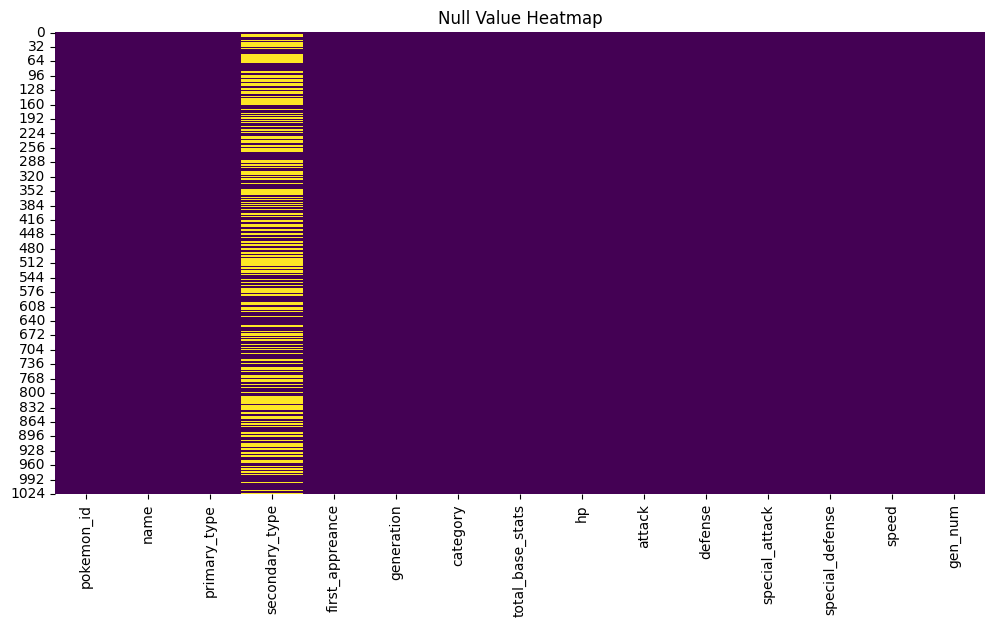

In [18]:
# Null Value Graph: Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pokemon.isnull(), cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.show()


# Analysis: Most of the pokemon does not have secondary_type

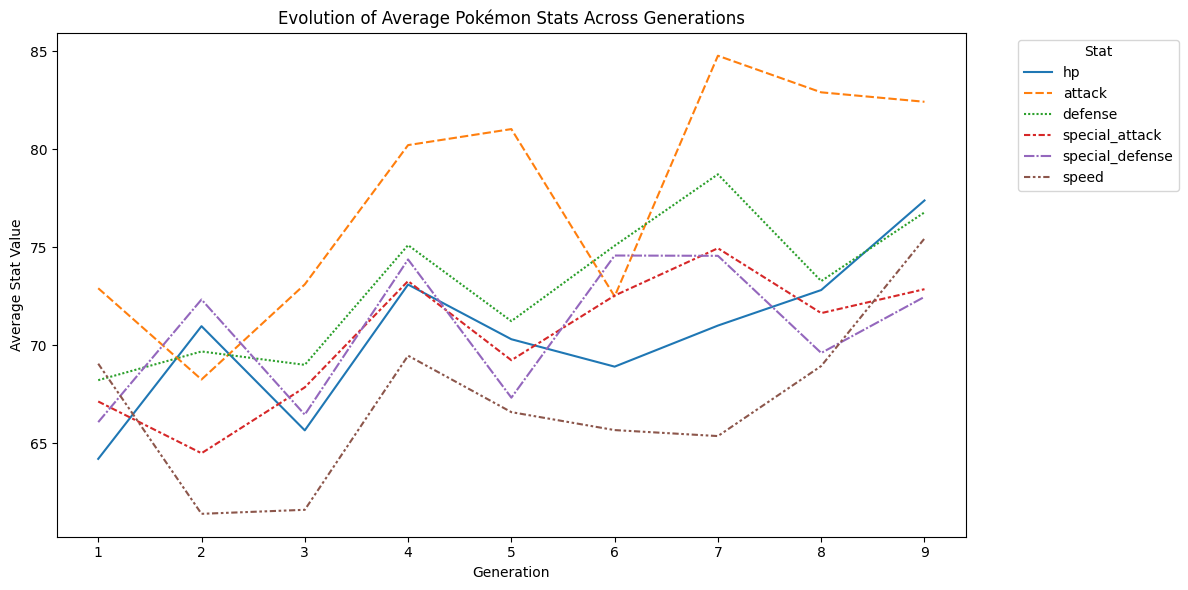

In [ ]:
# Visualize the evolution of stats across generations

# Assuming avg_stats_by_gen is already calculated and available
avg_stats_by_gen_filtered = avg_stats_by_gen.drop(columns=['total_base_stats'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_stats_by_gen_filtered)
plt.title('Evolution of Average Pokémon Stats Across Generations')
plt.xlabel('Generation')
plt.ylabel('Average Stat Value')
plt.legend(title='Stat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


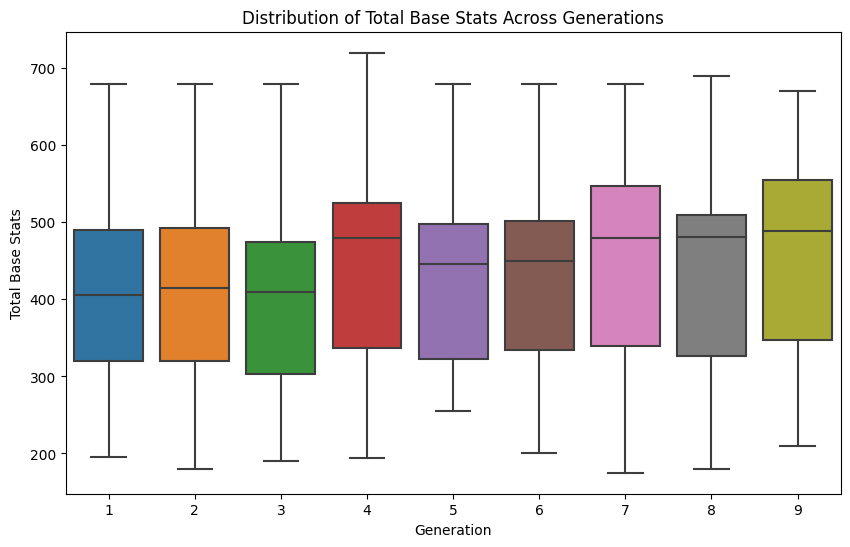

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gen_num', y='total_base_stats', data=pokemon)
plt.title('Distribution of Total Base Stats Across Generations')
plt.xlabel('Generation')
plt.ylabel('Total Base Stats')
plt.show()
